FINAL YEAR PROJECT - TEXT SUMMARIZATION AND CATEGORIZATION


In [1]:
#NLTK
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import heapq
from string import punctuation
punctuation = punctuation + '\n'

#Regular Expressions
import re  

#For data processing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read the dataset csv file
data = pd.read_csv(r"dataset/bbc_news_dataset.csv")
data.sample(20)

,ArticleId,Text,Category
1278,1169,redknapp poised for saints southampton are set...,sport
695,374,aviator creator in oscars snub the man who s...,entertainment
1106,1950,huge rush for jet airways shares indian airlin...,business
584,900,williams stays on despite dispute matt william...,sport
101,813,ukip could sue veritas defectors the uk indepe...,politics
686,37,gamers snap up new sony psp gamers have bought...,tech
351,1851,kennedy to make temple address charles kennedy...,politics
214,31,royal couple watch nation s mood prince charle...,politics
381,1793,worldcom bosses $54m payout ten former direct...,business
738,1280,wales want rugby league training wales could f...,sport


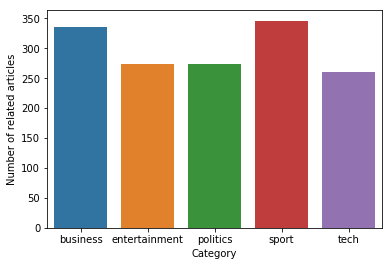

In [3]:
category_sizes = data.groupby('Category').size()
sns.barplot(x = category_sizes.index, y= category_sizes)
plt.xlabel('Category')
plt.ylabel('Number of related articles')
plt.show()

1. TEXT PREPROCESSING

In [4]:
#Preprocessing steps

# 1. Remove all URL links like http and www
def delete_links(input_text):
        #out_text = re.sub(r'http\S+', '', input_text)
        out_text = re.sub("((http|https)://)*(www.)?" +
            "[a-zA-Z0-9@:%._\\+~#?&//=]" +
            "{2,256}\\.[a-z]" +
            "{2,6}\\b([-a-zA-Z0-9@:%" +
            "._\\+~#?&//=]*)", "", input_text)
        return out_text

In [5]:

# 2. Remove HTML tags present in the text
from bs4 import BeautifulSoup
def strip_html_tags(input_text):
    soup = BeautifulSoup(input_text, "html.parser")
    out_text = soup.get_text(separator=" ")
    return out_text

In [6]:

# 3. Convert some foreign characters in text like to normal characters
# Ex: à, è, ù -> a, e, u
import unidecode
def convert_foreignchars(input_text):
    out_text = unidecode.unidecode(input_text)
    return out_text

In [7]:

# 4. Removing extra symbols
def remove_irrelevant_chars(input_text):
    out_text = re.sub('[^a-zA-Z]',' ',input_text)
    return out_text

In [8]:

# 5. Removing extra whitespaces in text
def remove_whitespace(input_text):
    out_text = input_text.strip()
    #out_text = " ".join(input_text.split())
    return " ".join(out_text.split())

In [9]:

# 6. Transform cases on the text (convert to lower-case)
def transform_cases(input_text):
    out_text = input_text.lower()
    
    return out_text

In [10]:

# 7. Delete repeated characters
# Ex: coool -> cool 
def delete_repeated_characters(input_text):
    pattern  = r'(.)\1{2,}'
    out_text = re.sub(pattern, r"\1\1", input_text)

    return out_text

In [11]:

# 8. Lemmatization
# Ex: saying -> say, took -> take
from nltk.stem import WordNetLemmatizer
def Lemmatization(input_text):
    k = WordNetLemmatizer()
    word_tokens = word_tokenize(input_text)

    out_text = []
    for w in word_tokens:
        out_text.append(k.lemmatize(word = w, pos = 'v'))
    
    return ' '.join(out_text)


In [12]:
# List of stop words
STOP_WORDS = nltk.corpus.stopwords.words('english')
print(len(STOP_WORDS))
print(STOP_WORDS)

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [13]:

# 9. Remove stopwords
# Ex: the, an, in, for
def remove_stopwords(input_text): 
    stop_words = set(stopwords.words('english'))
 
    word_tokens = word_tokenize(input_text)
 
    out_text = []
 
    for w in word_tokens:
        if w not in stop_words:
            out_text.append(w)
    #print(word_tokens)
    
    return ' '.join(out_text)

In [14]:
def text_prepare(input_text):
    out_text = delete_links(input_text)
    out_text = strip_html_tags(out_text)
    out_text = convert_foreignchars(out_text)
    out_text = remove_irrelevant_chars(out_text)
    out_text = remove_whitespace(out_text)
    out_text = transform_cases(out_text)
    out_text = delete_repeated_characters(out_text)
    out_text = Lemmatization(out_text)
    out_text = remove_stopwords(out_text)
    return out_text

In [15]:
def text_prepare2(input_text):
    out_text = remove_whitespace(input_text)
    return out_text

In [16]:
data['Processed Text'] = data['Text'].apply(text_prepare)
data.sample(5)

,ArticleId,Text,Category,Processed Text
1263,886,gronkjaer agrees switch to madrid jesper gronk...,sport,gronkjaer agree switch madrid jesper gronkjaer...
1058,2201,uk pioneers digital film network the world s f...,tech,uk pioneer digital film network world first di...
561,293,christmas song formula unveiled a formula for...,entertainment,christmas song formula unveil formula ultimate...
1384,1969,brussels raps mobile call charges the european...,business,brussels rap mobile call charge european commi...
140,1411,help for indies in download sales a campaign h...,entertainment,help indies download sales campaign launch hel...


2. TEXT SUMMARIZATION


In [17]:

def nltk_summarizer(input_text, number_of_sentences):
    stopWords = set(nltk.corpus.stopwords.words("english"))
    word_frequencies = {}
    k = nltk.word_tokenize(text_prepare(input_text))
    for word in k:  
        if word not in stopWords:
            if word not in punctuation:
                try:
                    word_frequencies[word] += 1
                except:
                    word_frequencies[word] = 1

    maximum_frequency = max(word_frequencies.values())
    #print(maximum_frequency)

    # finding weighted frequency
    for word in word_frequencies.keys():  
        word_frequencies[word] = (word_frequencies[word]/maximum_frequency)

    #print(word_frequencies)

    max_sent_len = 35

    sentence_list = nltk.sent_tokenize(input_text)
    sentence_scores = {}  
    for sent in sentence_list:  
        for word in nltk.word_tokenize(sent.lower()):
            if word in word_frequencies.keys():
                if len(sent.split(' ')) < max_sent_len:
                    try:
                        sentence_scores[sent] += word_frequencies[word]
                    except:
                        sentence_scores[sent] = word_frequencies[word]

    summary_sentences = heapq.nlargest(number_of_sentences,sentence_scores, key = sentence_scores.get)
    #print(summary_sentences)
    summary = ' '.join(summary_sentences)
    return text_prepare2(summary)

3. TEXT CATEGROIZATION

In [18]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Category Encoded'] = label_encoder.fit_transform(data['Category'])

data.sample(5)

,ArticleId,Text,Category,Processed Text,Category Encoded
765,1415,doves soar to uk album summit manchester rock ...,entertainment,doves soar uk album summit manchester rock ban...,1
523,496,thousands join strike in wales thousands of ci...,politics,thousands join strike wales thousands civil se...,2
691,2003,salary scandal in cameroon cameroon says wides...,business,salary scandal cameroon cameroon say widesprea...,0
281,513,digital guru floats sub-$100 pc nicholas negro...,tech,digital guru float sub pc nicholas negroponte ...,4
767,252,federer joins all-time greats the last year ha...,sport,federer join time greats last year see one pla...,3


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Processed Text'], data['Category Encoded'], test_size=0.2, random_state=0)

TF-IDF VECTORIZER

In [20]:
#tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
def tfidf_features(X_train, X_test):
    tfidf_vectorizer = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1,2))
    X_train = tfidf_vectorizer.fit_transform(X_train)
    X_test = tfidf_vectorizer.transform(X_test)
    return X_train, X_test

In [21]:
features_train, features_test = tfidf_features(X_train, X_test)

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier

def fit_model(model_name):
    if model_name == 'ridge_model':
        model_name = RidgeClassifier()
    elif model_name == 'logistic_regression_model':
        model_name = LogisticRegression()
    elif model_name == 'kneighbors_model':
        model_name = KNeighborsClassifier()
    elif model_name == 'gaussian_nb_model':
        model_name = GaussianNB()
    
    model_name.fit(features_train.toarray(), y_train)
    model_predictions = model_name.predict(features_test.toarray())
    print("Accuracy: ", accuracy_score(y_test, model_predictions))
    return model_name

In [23]:
categories = ['Economy & Business', 'Diverse News', 'Politics', 'Sports', 'Technology']

In [24]:
def TSC(input_text, number_of_sentences, model_name):
    # new_text = text_prepare(input_text)
    summary_text = nltk_summarizer(input_text, number_of_sentences)
    print("-------------------------------------------------------------------------------------------------------------------------------")
    print("... Summary ...")
    print("-------------------------------------------------------------------------------------------------------------------------------")
    print(summary_text)
    print("-------------------------------------------------------------------------------------------------------------------------------")
    input_text_arr = [text_prepare(input_text)]
    features_train, features_test = tfidf_features(X_train, input_text_arr)
    text_prediction = model_name.predict(features_test.toarray())
    print("Text category:", categories[text_prediction[0]])
    print("-------------------------------------------------------------------------------------------------------------------------------")

In [25]:
import pickle
ridge_model = fit_model('ridge_model')
pickle.dump(ridge_model, open('ML_models/ridge_model.pkl','wb'))

Accuracy:  0.9798657718120806


In [26]:
logistic_regression_model = fit_model('logistic_regression_model')
pickle.dump(logistic_regression_model, open('ML_models/logistic_regression_model.pkl','wb'))

Accuracy:  0.9865771812080537


In [27]:
kneighbors_model = fit_model('kneighbors_model')
pickle.dump(kneighbors_model, open('ML_models/kneighbors_model.pkl','wb'))

Accuracy:  0.9563758389261745


In [28]:
gaussian_nb_model = fit_model('gaussian_nb_model')
pickle.dump(gaussian_nb_model, open('ML_models/gaussian_nb_model.pkl','wb'))

Accuracy:  0.9530201342281879


TESTING WITH EXAMPLES

In [29]:
test_1 = """Political parties are constituted based on the same ideology and thinking.
Political parties are divided as left and right. 
Lefts are liberal, secular and pro-government ideologies, while the right is majoritarian, pro-poor and rebellious. 
In any country, politics incorporate the ruling government and the opposition party. 
Good politics consists of the government and its opposition, both working for its development.
Politics is not only restricted to the ruling government. 
It is also about the others who are still in the race to achieve the same passion. 
During the political debates and sessions, the opposition parties can question the ruling government. 
Opposition parties help the people to know about the plans implemented by the present government. 
These all can only be achieved by doing politics.
Political parties, for their gain, try to divide people based on class, creed and religion. 
This term is usually called communal polarisation. 
These cunning political parties play these innocent voters of India by making fancy promises in the name of development."""

In [30]:
TSC(test_1,6,kneighbors_model)

-------------------------------------------------------------------------------------------------------------------------------
... Summary ...
-------------------------------------------------------------------------------------------------------------------------------
In any country, politics incorporate the ruling government and the opposition party. During the political debates and sessions, the opposition parties can question the ruling government. Good politics consists of the government and its opposition, both working for its development. Opposition parties help the people to know about the plans implemented by the present government. Political parties, for their gain, try to divide people based on class, creed and religion. These cunning political parties play these innocent voters of India by making fancy promises in the name of development.
-------------------------------------------------------------------------------------------------------------------------------
Text ca

In [31]:
test_2 = """In this essay on technology, we are going to discuss what technology is, what are its uses, and also what technology can do? 
First of all, technology refers to the use of technical and scientific knowledge to create, monitor, and design machinery. 
Also, technology helps in making other goods that aid mankind. Experts are debating on this topic for years. 
Also, the technology covered a long way to make human life easier but the negative aspect of it can’t be ignored. 
Over the years technological advancement has caused a severe rise in pollution. 
Also, pollution has become a major cause of many health issues. 
Besides, it has cut off people from society rather than connecting them. 
Above all, it has taken away many jobs from the workers class.
As they are completely different fields but they are interdependent on each other. 
Also, it is due to science contribution we can create new innovation and build new technological tools. 
Apart from that, the research conducted in laboratories contributes a lot to the development of technologies. 
On the other hand, technology extends the agenda of science.
Regularly evolving technology has become an important part of our lives. 
Also, newer technologies are taking the market by storm and the people are getting used to them in no time. 
Above all, technological advancement has led to the growth and development of nations.
Although technology is a good thing, everything has two sides. 
Technology also has two sides one is good and the other is bad.
With new technology the industrialization increases which give birth to many pollutions like air, water, soil, and noise. 
Also, they cause many health-related issues in animals, birds, and human beings.
New technology requires new resources for which the balance is disturbed. 
Eventually, this will lead to over-exploitation of natural resources which ultimately disturbs the balance of nature.
A single machine can replace many workers. 
Also, machines can do work at a constant pace for several hours or days without stopping. 
Due to this, many workers lost their job which ultimately increases unemployment.
Generally, we judge technology on the same scale but in reality, technology is divided into various types. """

In [32]:
TSC(test_2, 9, gaussian_nb_model)

-------------------------------------------------------------------------------------------------------------------------------
... Summary ...
-------------------------------------------------------------------------------------------------------------------------------
In this essay on technology, we are going to discuss what technology is, what are its uses, and also what technology can do? With new technology the industrialization increases which give birth to many pollutions like air, water, soil, and noise. Also, the technology covered a long way to make human life easier but the negative aspect of it can’t be ignored. Generally, we judge technology on the same scale but in reality, technology is divided into various types. Also, it is due to science contribution we can create new innovation and build new technological tools. Technology also has two sides one is good and the other is bad. New technology requires new resources for which the balance is disturbed. Also, technology h

In [33]:
test_3 = """As Cricket has various formats, it has a different fan base for each of them. 
Some people like watching test matches because of their intensity and authenticity. 
While some enjoy Twenty-20, that require minimum engagement and are highly entertaining. 
Test Match is a format of cricket that is quite traditional.
It lasts up to five days and two countries play against each other in this match. 
Next up, we have the National League Systems, also called counties in England. 
Their duration is for three to four days.
Limited Overs Cricket is another type of sport where the number of episodes decides the format and length of the game. 
Both the teams get to play a single inning and thus results are determined.
However, if it rains, they apply the Duck worth- Lewis Method to attain results. One of the most common formats is One Day International also known as ODI. Two countries play against each other for a total of fifty overs. Finally, this is probably the most entertaining format of cricket, the Twenty-20. It only has 20 overs to play and is quite exciting and engaging."""

In [34]:
TSC(test_3, 5, ridge_model)

-------------------------------------------------------------------------------------------------------------------------------
... Summary ...
-------------------------------------------------------------------------------------------------------------------------------
Limited Overs Cricket is another type of sport where the number of episodes decides the format and length of the game. Test Match is a format of cricket that is quite traditional. It lasts up to five days and two countries play against each other in this match. Two countries play against each other for a total of fifty overs. Finally, this is probably the most entertaining format of cricket, the Twenty-20.
-------------------------------------------------------------------------------------------------------------------------------
Text category: Sports
-------------------------------------------------------------------------------------------------------------------------------


In [35]:
test_4 = """Business is a very demanding profession that has broadened and popularized over the years. 
A business requires high skills of management, teamwork, patience, mental strength, and effectiveness of work. 
A person should be mentally prepared to accept the fall of a business at any point of time in their life since it is not always secure. 
But, if planned properly, with help from the expertise and patiently blossomed over the years, then a business has a greater rate of success.
A business generally works with the coordination of several activities. 
Accounting, financial management, manufacturing, marketing, research and development, safety, and sales management are the various components that need to be tended to while running a good business with the aim of success. 
Investors, creditors, and regulators play a pivotal role in the profit of a business. 
Generally, there are four main types of businesses, which include sole proprietorships, partnerships, limited liability companies (LLC), and corporations. 
Before initiating a business, the entrepreneurs should carefully consider which structure is best suited for their enterprise."""

In [36]:
TSC(test_4, 5, kneighbors_model)

-------------------------------------------------------------------------------------------------------------------------------
... Summary ...
-------------------------------------------------------------------------------------------------------------------------------
Accounting, financial management, manufacturing, marketing, research and development, safety, and sales management are the various components that need to be tended to while running a good business with the aim of success. A business requires high skills of management, teamwork, patience, mental strength, and effectiveness of work. A person should be mentally prepared to accept the fall of a business at any point of time in their life since it is not always secure. But, if planned properly, with help from the expertise and patiently blossomed over the years, then a business has a greater rate of success. Investors, creditors, and regulators play a pivotal role in the profit of a business.
------------------------------

In [37]:
test_5 = """Legendary music studio to close the new york music studio where john lennon spent his final hours is to close next month.
The hit factory  which opened 37 years ago  has played host to some of the biggest stars in music  including paul simon, madonna and david bowie. 
However  the rise in digital recording has affected business at the studio  which is relocating to smaller premises in miami. 
Lennon recorded his final album double fantasy at the studio in 1979.
The studio was founded by jerry ragovoy in 1968.
In 1975 it was sold to fellow producer edward germano  who turned it into a 100 000 square foot studio with seven recording rooms and live mastering suites.
His first client was stevie wonder  who recorded part of his classic album songs in the key of life there.
Other well-known albums to be recorded or partially recorded at the studio include bruce springsteen's born in the usa  the rolling stones  emotional rescue and paul simon s graceland. 
Michael jackson  billy joel  jay-z and beyonce are also among artists who have used the hit factory in the past  as well as 50 cent who survived an attempt on his life as he left the premises in 2000. 
The studio made history in 1994 when it won a record 41 grammy nominations for songs recorded  mastered or mixed there  including the soundtrack to the whitney houston film the bodyguard."""

In [38]:
TSC(test_5, 6, logistic_regression_model)

-------------------------------------------------------------------------------------------------------------------------------
... Summary ...
-------------------------------------------------------------------------------------------------------------------------------
Legendary music studio to close the new york music studio where john lennon spent his final hours is to close next month. The studio made history in 1994 when it won a record 41 grammy nominations for songs recorded mastered or mixed there including the soundtrack to the whitney houston film the bodyguard. Other well-known albums to be recorded or partially recorded at the studio include bruce springsteen's born in the usa the rolling stones emotional rescue and paul simon s graceland. The hit factory which opened 37 years ago has played host to some of the biggest stars in music including paul simon, madonna and david bowie. Lennon recorded his final album double fantasy at the studio in 1979. In 1975 it was sold to f